# **Table of Content** 📝
> ### 1. Introduction
> ### 2. Importing Library
> ### 3. Loading Dataset
> ### 4. Checking for Null Values
> ### 5. EDA
> ### 6. Splitting Data
> ### 7. Building Model
> ### 8. Predicting 

## 1. Introduction:
> ### This notebook is about Wine classification uisng Deep Neural Network.
> ### Data is gather from this link [White](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality) and [Red](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality)


## 2. Importing Library:

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Loading Dataset:

In [30]:
# # Read in white wine data 
# white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# # Read in red wine data 
# red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
# Read in white wine data 
white = pd.read_csv("MQSensorData_updated.csv", sep=',')

# Read in red wine data 
red = pd.read_csv("MQSensorData_updated.csv", sep=',')

# Fake wine for testing (the above two are also just for testing for now)
green = pd.read_csv("MQSensorData_updated.csv", sep=',')

In [31]:
# Print info on white wine
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MQ3     282 non-null    int64 
 1   MQ135   282 non-null    int64 
 2   MQ8     282 non-null    int64 
 3   MQ5     282 non-null    int64 
 4   MQ7     282 non-null    int64 
 5   mq4     282 non-null    int64 
 6   mq6     282 non-null    int64 
 7   MQ2     282 non-null    int64 
 8   MQ9     282 non-null    int64 
 9   Target  282 non-null    object
dtypes: int64(9), object(1)
memory usage: 22.2+ KB
None


In [32]:
# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MQ3     282 non-null    int64 
 1   MQ135   282 non-null    int64 
 2   MQ8     282 non-null    int64 
 3   MQ5     282 non-null    int64 
 4   MQ7     282 non-null    int64 
 5   mq4     282 non-null    int64 
 6   mq6     282 non-null    int64 
 7   MQ2     282 non-null    int64 
 8   MQ9     282 non-null    int64 
 9   Target  282 non-null    object
dtypes: int64(9), object(1)
memory usage: 22.2+ KB
None


In [33]:
white.describe()

,MQ3,MQ135,MQ8,MQ5,MQ7,mq4,mq6,MQ2,MQ9
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,567.624113,437.163121,667.312057,615.358156,201.549645,647.351064,508.670213,496.180851,485.960993
std,20.562045,8.067001,2.416240,4.689212,17.993851,12.661237,4.608645,0.847388,5.912340
min,552.000000,424.000000,664.000000,555.000000,182.000000,637.000000,504.000000,494.000000,481.000000
25%,553.000000,426.000000,665.000000,613.000000,186.000000,639.000000,505.000000,496.000000,482.000000
50%,555.000000,442.000000,666.000000,614.000000,207.000000,640.000000,506.000000,496.000000,483.000000
75%,597.000000,443.000000,670.000000,619.000000,208.000000,665.000000,515.000000,497.000000,494.000000
max,602.000000,445.000000,672.000000,622.000000,441.000000,671.000000,517.000000,498.000000,497.000000


In [34]:
red.describe()

,MQ3,MQ135,MQ8,MQ5,MQ7,mq4,mq6,MQ2,MQ9
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,567.624113,437.163121,667.312057,615.358156,201.549645,647.351064,508.670213,496.180851,485.960993
std,20.562045,8.067001,2.416240,4.689212,17.993851,12.661237,4.608645,0.847388,5.912340
min,552.000000,424.000000,664.000000,555.000000,182.000000,637.000000,504.000000,494.000000,481.000000
25%,553.000000,426.000000,665.000000,613.000000,186.000000,639.000000,505.000000,496.000000,482.000000
50%,555.000000,442.000000,666.000000,614.000000,207.000000,640.000000,506.000000,496.000000,483.000000
75%,597.000000,443.000000,670.000000,619.000000,208.000000,665.000000,515.000000,497.000000,494.000000
max,602.000000,445.000000,672.000000,622.000000,441.000000,671.000000,517.000000,498.000000,497.000000


## 4. Checking for null values:

In [35]:
pd.isnull(red).count()

MQ3       282
MQ135     282
MQ8       282
MQ5       282
MQ7       282
mq4       282
mq6       282
MQ2       282
MQ9       282
Target    282
dtype: int64

In [36]:
pd.isnull(white).count()

MQ3       282
MQ135     282
MQ8       282
MQ5       282
MQ7       282
mq4       282
mq6       282
MQ2       282
MQ9       282
Target    282
dtype: int64

## 5. EDA

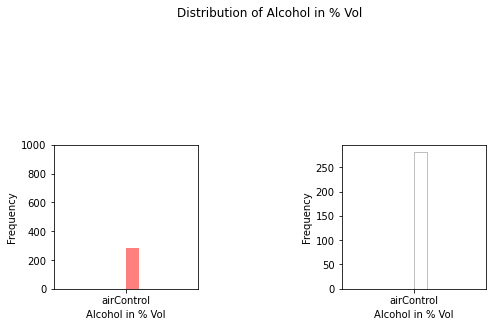

In [37]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.Target, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.Target, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

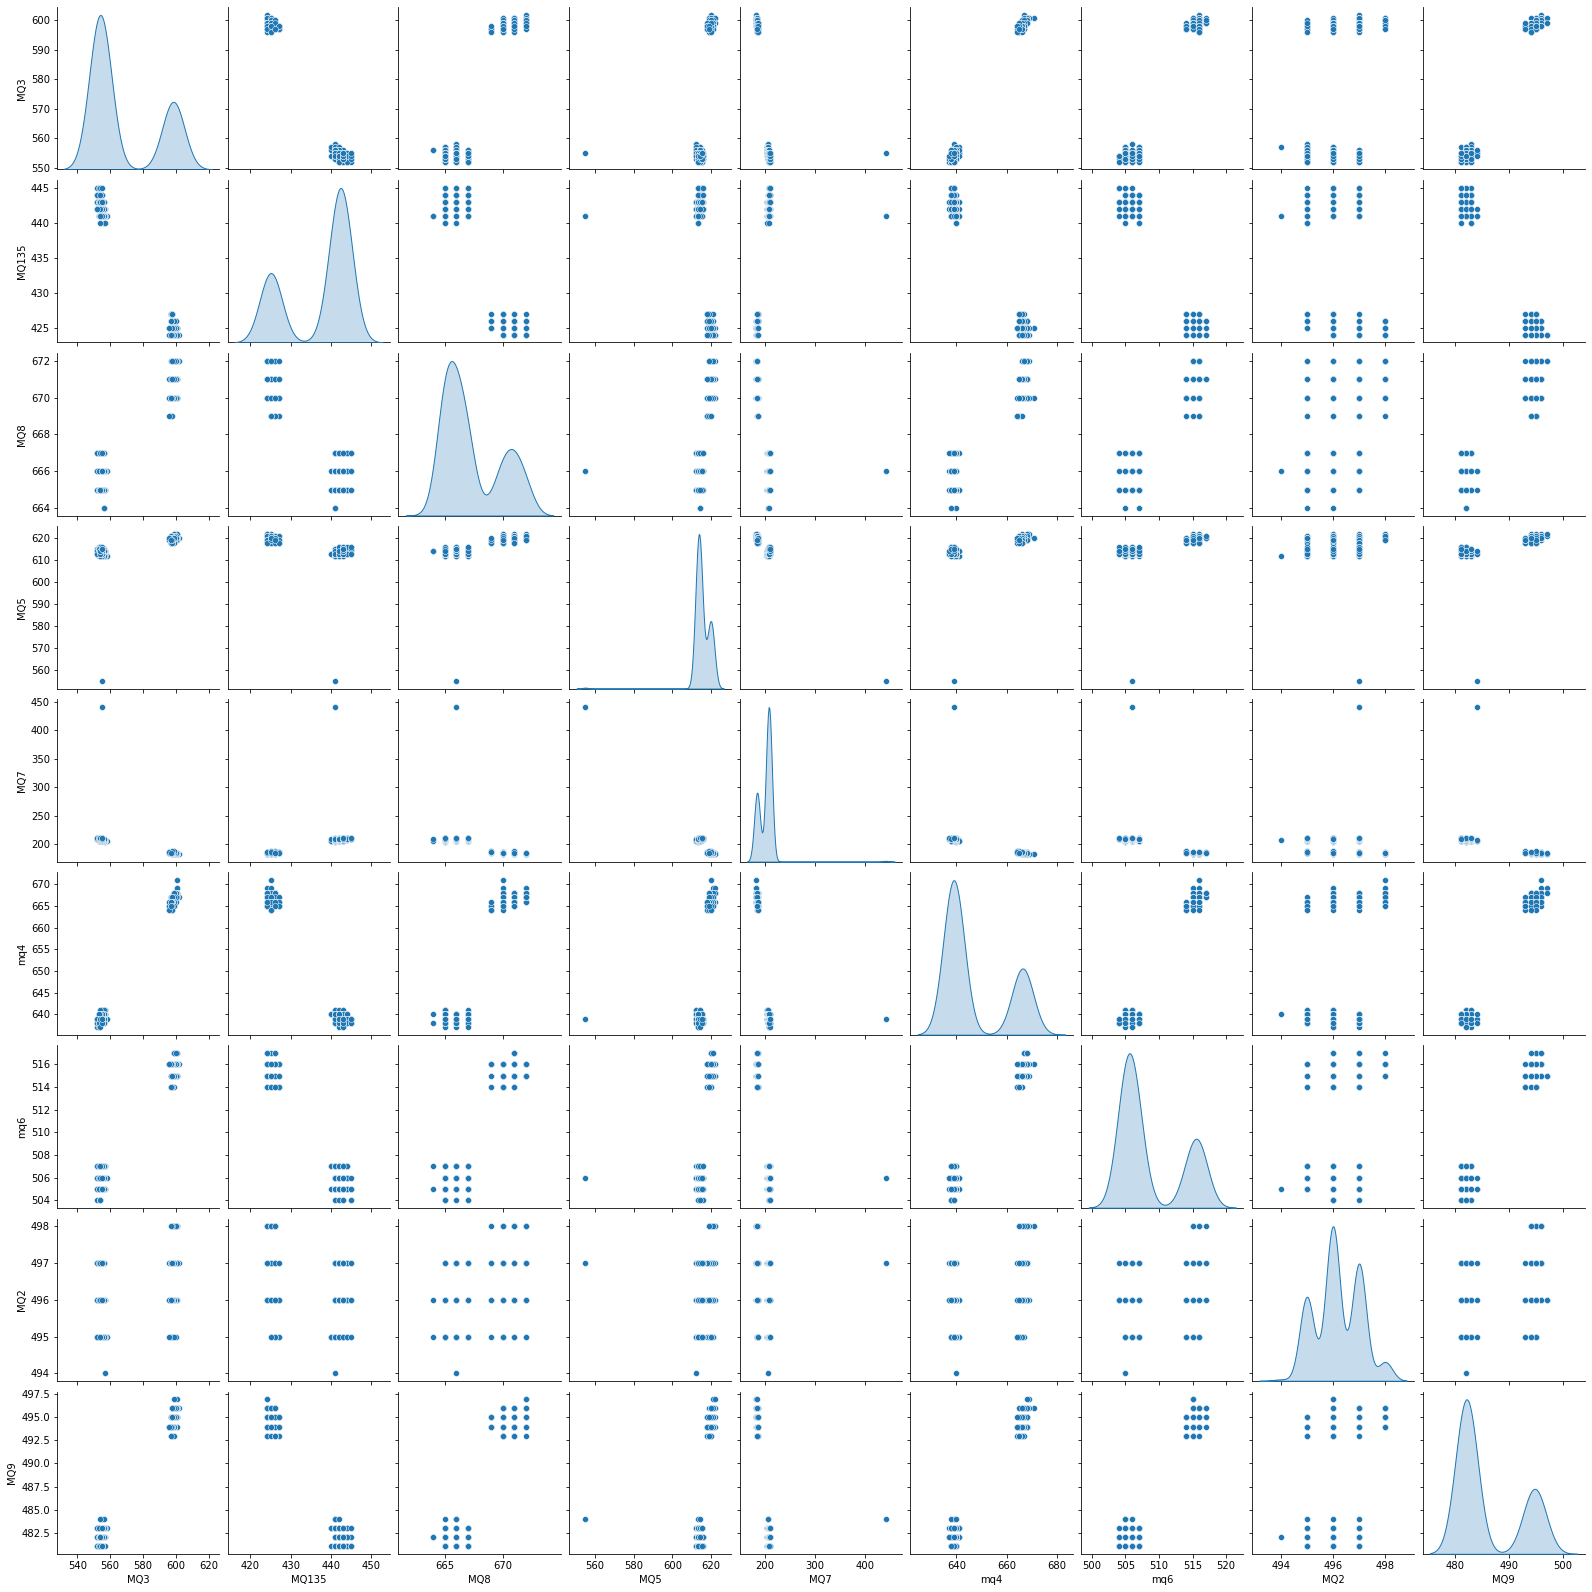

In [38]:
sns.pairplot(data=red, diag_kind = 'kde')

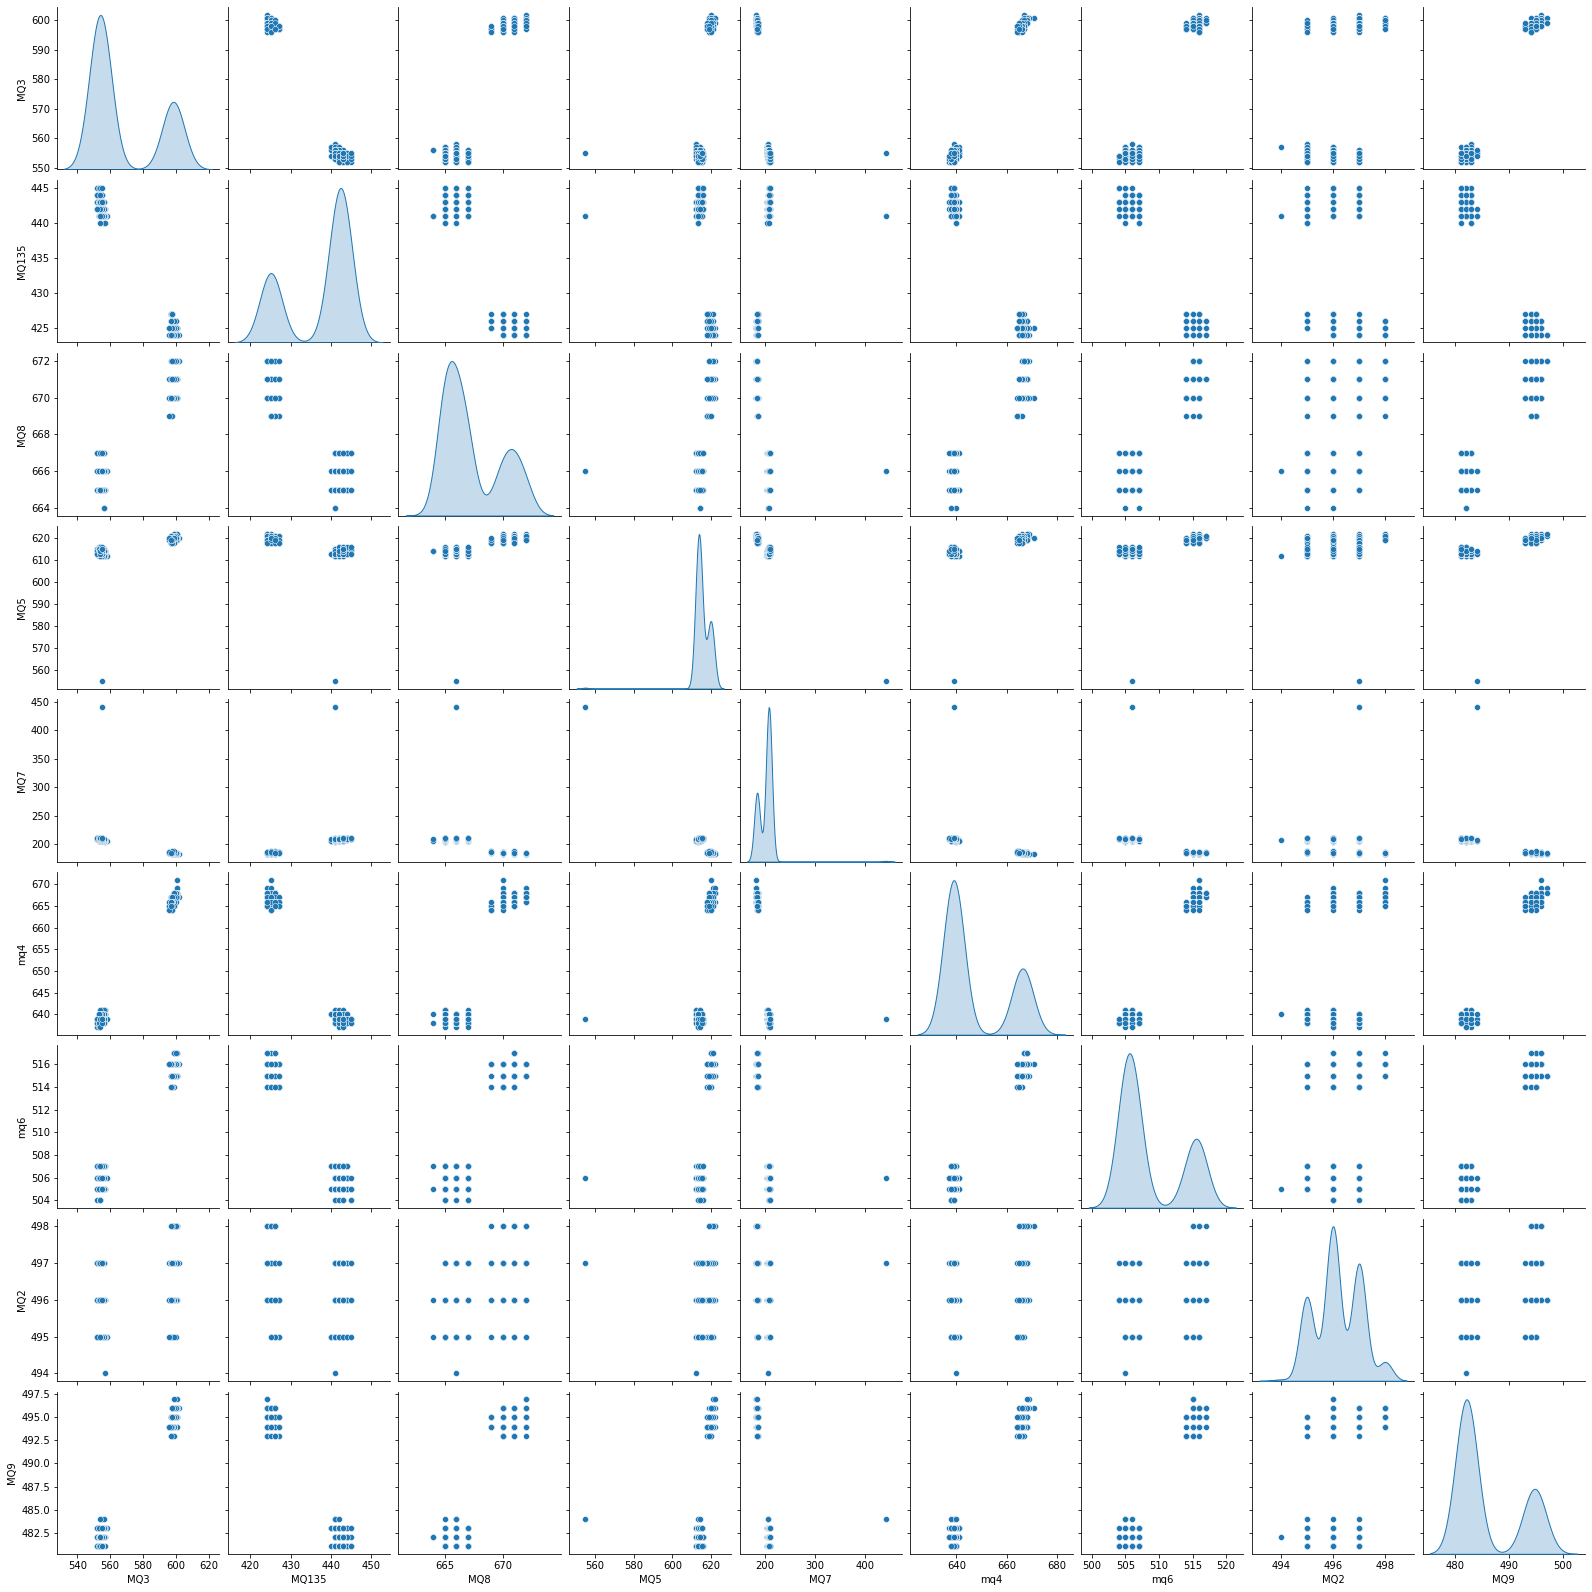

In [39]:
sns.pairplot(data=white, diag_kind = 'kde')

In [40]:
# Add `type` column to `red` with value 1
red['Target'] = 1

# Add `type` column to `white` with value 0
white['Target'] = 0

# Add `type` column to `white` with value 0
green['Target'] = 2

# Append `white` to `red`
wines = red.append(white, ignore_index=True)
wines = wines.append(green, ignore_index=True)
wines.tail()

,MQ3,MQ135,MQ8,MQ5,MQ7,mq4,mq6,MQ2,MQ9,Target
841,554,443,667,614,211,637,506,496,482,2
842,555,445,667,616,210,639,505,497,481,2
843,554,443,665,614,210,639,504,497,482,2
844,555,443,666,615,208,638,505,496,481,2
845,555,443,666,615,210,639,506,497,483,2


In [42]:
# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array
y= np.ravel(wines.Target)
#y= wines.type

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
y_test[0:10] 

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [43]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [45]:
# Example assuming X_train and X_test are numpy arrays
print("X_train shape:", np.array(X_train).shape)
print("X_test shape:", np.array(X_test).shape)

X_train shape: (592, 10)
X_test shape: (254, 10)


## 6. Building Deep Neural Network

In [50]:
# # Function to compute loss and accuracy
# def evaluate_model(model, data_loader, criterion):
#     model.eval()
#     total_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0

#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()

#             _, predicted = torch.max(outputs, 1)  # Get the predicted class
#             correct_predictions += (predicted == labels).sum().item()
#             total_samples += labels.size(0)

#     average_loss = total_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples

#     return average_loss, accuracy

# # Training the model
# num_epochs = 20
# train_losses = []
# train_accuracies = []
# test_losses = []
# test_accuracies = []

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
        
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
    
#     average_train_loss = running_loss / len(train_loader)
#     train_accuracy = evaluate_model(model, train_loader, criterion)[1]
#     test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

#     train_losses.append(average_train_loss)
#     train_accuracies.append(train_accuracy)
#     test_losses.append(test_loss)
#     test_accuracies.append(test_accuracy)

#     print(f'Epoch {epoch+1}/{num_epochs}, '
#           f'Train Loss: {average_train_loss:.4f}, '
#           f'Train Accuracy: {train_accuracy:.4f}, '
#           f'Test Loss: {test_loss:.4f}, '
#           f'Test Accuracy: {test_accuracy:.4f}')

# print("Training complete")

# # Plotting
# plt.figure(figsize=(12, 6))

# # Plot accuracy
# plt.subplot(211)
# plt.title('Accuracy')
# plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
# plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', marker='o')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# # Plot loss
# plt.subplot(212)
# plt.title('Loss')
# plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
# plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 11x10)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the MLP architecture
class WineClassifier(nn.Module):
    def __init__(self):
        super(WineClassifier, self).__init__()
        self.fc1 = nn.Linear(9, 64)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(64, 32) # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(32, 7)  # Second hidden layer to output layer (7 classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Raw scores for each class
        return x

# Initialize the model
model = WineClassifier()


## 7.Prediction:

In [ ]:
# from sklearn import metrics

# print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

            pred:White  pred:Red
true:White        1444         4
true:Red             7       495


In [ ]:
# import torch
# import torch.nn.functional as F

# # Function to compute loss and accuracy
# def evaluate_model(model, data_loader, criterion):
#     model.eval()  # Set the model to evaluation mode
#     total_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0

#     with torch.no_grad():  # Disable gradient calculation
#         for inputs, labels in data_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()

#             # Convert outputs to predicted class labels
#             predicted = (outputs >= 0.5).float()  # Assuming binary classification

#             # Count the number of correct predictions
#             correct_predictions += (predicted == labels).sum().item()
#             total_samples += labels.size(0)

#     average_loss = total_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples

#     return average_loss, accuracy

# # Convert X_test and y_test to DataLoader
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Ensure y_test has shape [n_samples, 1]
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# # Convert X_train and y_train to DataLoader
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Ensure y_train has shape [n_samples, 1]
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)

# # Define the loss function
# criterion = nn.BCELoss()

# # Evaluate on the test set
# test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
# print('Test Accuracy: %.3f' % test_accuracy)

# # Evaluate on the train set
# train_loss, train_accuracy = evaluate_model(model, train_loader, criterion)
# print('Train Accuracy: %.3f' % train_accuracy)



Test Accuracy: 0.994
Train Accuracy: 0.997


In [ ]:
# import matplotlib.pyplot as plt

# # Plot the losses
# plt.figure(figsize=(12, 6))

# # Plot training and test loss
# plt.subplot(2, 1, 1)
# plt.plot(epochs, train_losses, label='Train Loss', marker='o')
# plt.plot(epochs, test_losses, label='Test Loss', marker='o')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Plot training and test accuracy
# plt.subplot(2, 1, 2)
# plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
# plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

In [ ]:
# %matplotlib inline
# from matplotlib import pyplot
# from numpy import where

# # plot loss during training
# pyplot.subplot(211)
# pyplot.title('Loss')
# pyplot.plot(history.history['loss'], label='train')
# pyplot.legend()